In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
df=pd.read_csv('/content/gdrive/My Drive/hernia_spond.csv')

In [4]:
df

,id,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,1,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,2,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,3,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,4,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,5,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...,...
205,206,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Spondylolisthesis
206,207,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Spondylolisthesis
207,208,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Spondylolisthesis
208,209,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Spondylolisthesis


In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labenc=LabelEncoder()    #label or indexing of categorical data
df["class"]=labenc.fit_transform(df["class"])   
df

,id,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,1,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,2,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,3,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,4,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,5,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...,...
205,206,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,207,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,208,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,209,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


In [6]:
df['class'].value_counts()

1    150
0     60
Name: class, dtype: int64

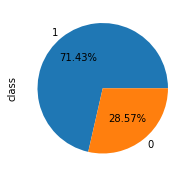

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
pd.Series(df['class']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

In [10]:
X=df.drop(columns = ['class'])
y=df['class']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [12]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [13]:
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


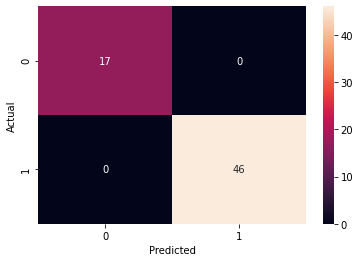

In [14]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [15]:
import sklearn.metrics as metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  1.0


In [16]:
!pip install scikit-plot==0.3.7

In [17]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

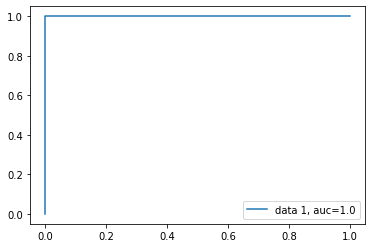

In [18]:
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [21]:
!pip install plot-metric

In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

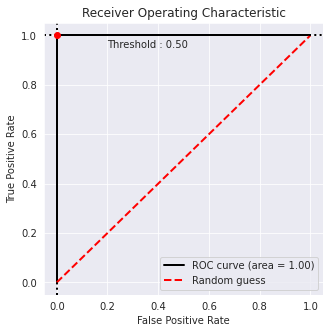

In [24]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [25]:
y_score_rf = logistic_regression.predict_proba(X_test)[:,-1]

In [26]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_test, y_score_rf)

print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 1.0


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

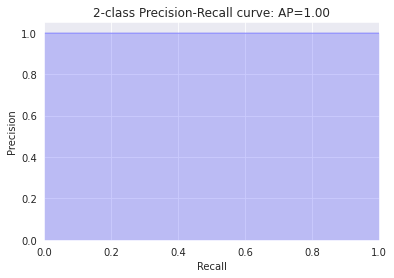

In [27]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score_rf)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))